In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings

%load_ext autoreload
%autoreload 2

from src.features import *
from src.utils import *
from src.models import *
from src.optimizers import *
from src.loss_functions import *
from src.dataloaders import *
from src.security import NEPTUNE_TOKEN
from src.pipeline_functions import *

plt.style.use("ggplot")
# show all columns
pd.set_option("display.max_columns", None)

warnings.filterwarnings("ignore")

In [2]:
stocks = ["SPY", "VTV", "VUG", "VYM", "QQQ", "VNQ", "GLD", "AGG", "SOXX", "OIH", "IYT", "XLF", "XLV", "VOX", "XLY", "XLP", "BND", "BSV", "IEMG", "VEA", "VWO"]
stocks = sorted(stocks)

stock_classes = {'AGG': 'EQUITY', 'GLD': 'COMMODITY', 'IYT': 'EQUITY', 'OIH': 'EQUITY', 'QQQ': 'EQUITY',
                 'SOXX': 'EQUITY', 'SPY': 'EQUITY', 'VNQ': 'REAL_ESTATE', 'VOX': 'EQUITY', 'VTV': 'EQUITY',
                 'VUG': 'EQUITY', 'VYM': 'EQUITY', 'XLF': 'EQUITY', 'XLP': 'EQUITY', 'XLV': 'EQUITY', 'XLY': 'EQUITY',
                 "BND": "FIXED_INCOME", "BSV": "FIXED_INCOME", "IEMG": "EQUITY", "VEA": "EQUITY", "VWO": "EQUITY"
}

classes_color = {'EQUITY': 'salmon', 'COMMODITY': 'cyan', 'FIXED_INCOME': 'lightgreen', "REAL_ESTATE": "lightblue"}

len(stocks)

21

In [3]:
path = "C:\\Users\\Андрей\\Documents\\diploma_python\\data"

df_adj_close, df_close, df_high, df_low, df_volume = get_data(path, stocks)

AGG Start of history: 2003-09-29
BND Start of history: 2007-04-10
BSV Start of history: 2007-04-10
GLD Start of history: 2004-11-18
IEMG Start of history: 2012-10-24
IYT Start of history: 2004-01-02
OIH Start of history: 2001-02-26
QQQ Start of history: 1999-03-10
SOXX Start of history: 2001-07-13
SPY Start of history: 1993-01-29
VEA Start of history: 2007-07-26
VNQ Start of history: 2004-09-29
VOX Start of history: 2004-09-29
VTV Start of history: 2004-01-30
VUG Start of history: 2004-01-30
VWO Start of history: 2005-03-10
VYM Start of history: 2006-11-16
XLF Start of history: 1998-12-22
XLP Start of history: 1998-12-22
XLV Start of history: 1998-12-22
XLY Start of history: 1998-12-22


In [8]:
#pred_window
cases = {0: 1,
         1: 3,
         2: 5,
         3: 7,
         4: 10,
         5: 14}

In [9]:
TRAIN = 1800
PERIOD = 90 #max window for features' calculation

model_dic = {}
SEED = 45

for i in tqdm(range(6)):

    nodes_matrix, combined_adj_matrix, cov_adj_matrix, future_return, df_return, df_features = features_pipeline(df_adj_close, df_close, df_high, df_low, df_volume, 
                                                                                                                 forecast_period=cases[i],
                                                                                                                 stocks=stocks)
    train_dataset = Dataset(nodes_matrix[:TRAIN],
                            combined_adj_matrix[:TRAIN],
                            cov_adj_matrix[:TRAIN],
                            future_return[:TRAIN])
    
    test_dataset = Dataset(nodes_matrix[TRAIN+PERIOD:],
                            combined_adj_matrix[TRAIN+PERIOD:],
                            cov_adj_matrix[TRAIN+PERIOD:],
                            future_return[TRAIN+PERIOD:])
    
    set_seed(SEED)

    model = GrossModel(num_features=23, num_relations=5, num_assets=21, sample_size=10, pred_window=cases[i], n_heads=1, 
                       train_gamma=False, gamma=0.01)
    
    optim = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

    _, _ = train(model, optim, train_dataset, epochs=4,
                                eval_func='sharpe_loss', exp_name=f'exp_2805_pred_window_v{i}', neptune_token=NEPTUNE_TOKEN,
                                neptune_project="aibabynin/graphs", tags=["pred_window"])
    
    model_dic[i] = {"model": model,
                    "optimizer": optim,
                    "train_dataset": train_dataset,
                    "test_dataset": test_dataset,
                    "df_return": df_return,
                    "df_features": df_features,
                    "future_return": future_return,
                    "nodes_matrix": nodes_matrix,
                    "combined_adj_matrix": combined_adj_matrix,
                    "cov_adj_matrix": cov_adj_matrix
                    }

  0%|          | 0/6 [00:00<?, ?it/s]

Features generated and scaled
Return features generated
Correlation and covariance matrices generated
Common index length 2420


100%|██████████| 2420/2420 [06:03<00:00,  6.66it/s]


Adjacency matrices generated
Pipeline finished
https://app.neptune.ai/aibabynin/graphs/e/GRAP-47
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 4 operations to synchronize with Neptune. Do not kill this process.
All 4 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/aibabynin/graphs/e/GRAP-47/metadata


 17%|█▋        | 1/6 [28:41<2:23:25, 1721.10s/it]

Features generated and scaled
Return features generated
Correlation and covariance matrices generated
Common index length 2418


100%|██████████| 2418/2418 [05:48<00:00,  6.94it/s]


Adjacency matrices generated
Pipeline finished
https://app.neptune.ai/aibabynin/graphs/e/GRAP-48
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 8 operations to synchronize with Neptune. Do not kill this process.
All 8 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/aibabynin/graphs/e/GRAP-48/metadata


 33%|███▎      | 2/6 [56:34<1:52:51, 1692.95s/it]

Features generated and scaled
Return features generated
Correlation and covariance matrices generated
Common index length 2416


100%|██████████| 2416/2416 [05:26<00:00,  7.40it/s]


Adjacency matrices generated
Pipeline finished
https://app.neptune.ai/aibabynin/graphs/e/GRAP-49
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 2 operations to synchronize with Neptune. Do not kill this process.
All 2 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/aibabynin/graphs/e/GRAP-49/metadata


 50%|█████     | 3/6 [1:21:25<1:20:02, 1600.98s/it]

Features generated and scaled
Return features generated
Correlation and covariance matrices generated
Common index length 2414


100%|██████████| 2414/2414 [04:55<00:00,  8.17it/s]


Adjacency matrices generated
Pipeline finished
https://app.neptune.ai/aibabynin/graphs/e/GRAP-50
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 10 operations to synchronize with Neptune. Do not kill this process.
All 10 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/aibabynin/graphs/e/GRAP-50/metadata


 67%|██████▋   | 4/6 [1:44:42<50:40, 1520.25s/it]  

Features generated and scaled
Return features generated
Correlation and covariance matrices generated
Common index length 2411


100%|██████████| 2411/2411 [04:54<00:00,  8.19it/s]


Adjacency matrices generated
Pipeline finished
https://app.neptune.ai/aibabynin/graphs/e/GRAP-51
Shutting down background jobs, please wait a moment...
Done!
All 0 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/aibabynin/graphs/e/GRAP-51/metadata


 83%|████████▎ | 5/6 [2:07:48<24:31, 1471.95s/it]

Features generated and scaled
Return features generated
Correlation and covariance matrices generated
Common index length 2407


100%|██████████| 2407/2407 [04:54<00:00,  8.16it/s]


Adjacency matrices generated
Pipeline finished
https://app.neptune.ai/aibabynin/graphs/e/GRAP-52
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 2 operations to synchronize with Neptune. Do not kill this process.
All 2 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/aibabynin/graphs/e/GRAP-52/metadata


100%|██████████| 6/6 [2:32:22<00:00, 1523.72s/it]


In [10]:
for i in range(6):
    torch.save(model_dic[i]['model'].state_dict(), f"model_pred_window_{i}_sr.pt")

In [11]:
for i in range(6):
    test_weights_matrix = evaluate(model_dic[i]['model'], model_dic[i]['test_dataset'])
    model_dic[i]['test_weights_matrix'] = test_weights_matrix
    
    print(f"{i} is evaluated")

100%|██████████| 519/519 [00:21<00:00, 23.83it/s]


0 is evaluated


100%|██████████| 515/515 [00:23<00:00, 22.26it/s]


1 is evaluated


100%|██████████| 511/511 [00:22<00:00, 22.45it/s]


2 is evaluated


100%|██████████| 507/507 [00:22<00:00, 22.80it/s]


3 is evaluated


100%|██████████| 501/501 [00:22<00:00, 22.45it/s]


4 is evaluated


100%|██████████| 493/493 [00:21<00:00, 23.01it/s]

5 is evaluated


In [16]:
common_index = model_dic[5]['df_return'].iloc[TRAIN+PERIOD+model_dic[5]['model'].sample_size+model_dic[5]['model'].pred_window:].index

In [17]:
model_dic[0]['df_return'].tail()

,Adj_Close_AGG,Adj_Close_BND,Adj_Close_BSV,Adj_Close_GLD,Adj_Close_IEMG,Adj_Close_IYT,Adj_Close_OIH,Adj_Close_QQQ,Adj_Close_SOXX,Adj_Close_SPY,Adj_Close_VEA,Adj_Close_VNQ,Adj_Close_VOX,Adj_Close_VTV,Adj_Close_VUG,Adj_Close_VWO,Adj_Close_VYM,Adj_Close_XLF,Adj_Close_XLP,Adj_Close_XLV,Adj_Close_XLY
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-17,0.002353,0.002211,0.001195,0.002987,-0.008690,-0.003099,-0.045717,-0.007056,-0.015574,-0.002498,0.001549,-0.003910,-0.003064,0.001956,-0.008446,-0.008041,0.001277,0.000275,0.012923,0.008944,0.000199
2023-02-21,-0.009388,-0.008685,-0.003182,-0.003737,-0.012436,-0.029848,-0.018913,-0.023675,-0.032386,-0.020061,-0.012591,-0.020074,-0.022679,-0.016039,-0.024674,-0.011054,-0.015942,-0.020610,-0.003800,-0.012956,-0.033407
2023-02-22,0.002678,0.002225,0.000266,-0.005626,-0.004542,-0.006057,-0.028770,0.000748,-0.004796,-0.001378,-0.005817,-0.009041,0.002602,-0.002551,0.000731,-0.004223,-0.002685,-0.001122,-0.001499,-0.003377,0.005085
2023-02-23,0.003596,0.003608,0.000931,-0.000530,0.005185,0.012938,0.019715,0.008734,0.032882,0.005319,0.005851,0.007507,-0.005300,0.001918,0.008340,0.003492,0.001949,0.000843,-0.001228,0.002696,-0.000820
2023-02-24,-0.005732,-0.005530,-0.002790,-0.007195,-0.021250,-0.005972,0.020848,-0.016744,-0.017912,-0.010682,-0.015660,-0.017538,-0.014787,-0.004964,-0.017097,-0.019140,-0.003706,0.000842,-0.006694,-0.012904,-0.015736


In [22]:
model_dic[0]['df_return'].iloc[TRAIN+PERIOD+model_dic[5]['model'].sample_size+model_dic[5]['model'].pred_window:-13].shape

(493, 21)

In [27]:
model_dic[0]['test_weights_matrix'][13:-13].shape
    

(493, 21)

In [30]:
ret = model_dic[5]['df_return'].iloc[TRAIN+PERIOD+model_dic[5]['model'].sample_size+model_dic[5]['model'].pred_window:].values
index = model_dic[5]['df_return'].iloc[TRAIN+PERIOD+model_dic[5]['model'].sample_size+model_dic[5]['model'].pred_window:].index


returns_matrix = np.zeros((6, len(ret)))

for i in range(6):

    diff = model_dic[5]['model'].pred_window - model_dic[i]['model'].pred_window
    if diff>0:
        returns_matrix[i] = (ret * model_dic[i]['test_weights_matrix'][diff:-diff]).sum(1)
    else:
        returns_matrix[i] = (ret * model_dic[i]['test_weights_matrix']).sum(1)

    

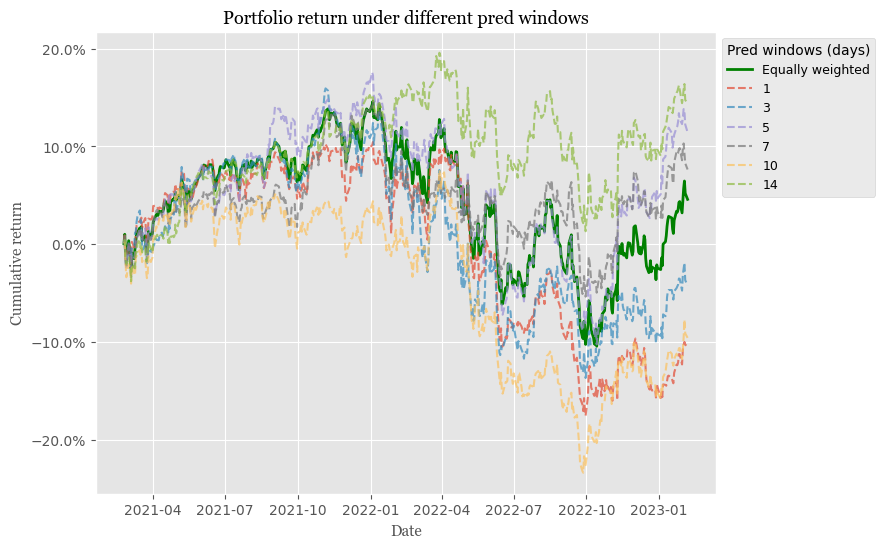

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
_ = plt.plot(index, (ret.mean(1)+1).cumprod()- 1, color='green', label='Equally weighted', linewidth=2)

for i in range(6):
    _ = plt.plot(index, (returns_matrix[i]+1).cumprod()- 1, label=cases[i], alpha=0.7, linestyle='--')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Date', fontsize=11, fontname='Georgia')
plt.ylabel('Cumulative return', fontsize=11, fontname='Georgia')
plt.title('Portfolio return under different pred windows', fontsize=13, fontname='Georgia')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Pred windows (days)', fontsize=9)
plt.show()

Statistics

In [37]:
stat_table = {}

for i in range(6):
    stat_table[i] = {}
    ret = ((returns_matrix[i]+1).cumprod()- 1)[-1]
    std = returns_matrix[i].std()*np.sqrt(returns_matrix[i].shape[0])
    stat_table[i]['sr'] = ret/std
    stat_table[i]['return']  = ret
    stat_table[i]['std'] = std

In [38]:
stat_table

{0: {'sr': -0.47968284728392113,
  'return': -0.10447637988390346,
  'std': 0.2178030348082565},
 1: {'sr': -0.16675044196124264,
  'return': -0.042001053356589324,
  'std': 0.25187971235693346},
 2: {'sr': 0.48002084176118337,
  'return': 0.1144114568836212,
  'std': 0.23834685274049494},
 3: {'sr': 0.3773267278115665,
  'return': 0.07647655598784553,
  'std': 0.2026799332011201},
 4: {'sr': -0.424860084232693,
  'return': -0.09552667087984634,
  'std': 0.22484265861870664},
 5: {'sr': 0.7344438621318798,
  'return': 0.14405791683377323,
  'std': 0.19614557934436871}}